# ***Project 5: Support Vector Classifaction***
## **Problem 3**: Satellite
## **Author**: Ian R. Stewart
## **Due**: December 8, 2018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import random; import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
features = ['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7','Feature 8','Feature 9','Feature 10','Feature 11','Feature 12','Feature 13','Feature 14','Feature 15','Feature 16','Feature 17','Feature 18','Feature 19','Feature 20','Feature 21','Feature 22','Feature 23','Feature 24','Feature 25','Feature 26','Feature 27','Feature 28','Feature 29','Feature 30','Feature 31','Feature 32','Feature 33','Feature 34','Feature 35','Feature 36','Class']
# Importing TRAINING data
df = pd.read_csv('./sat.trn',sep='\s+',names=features)
# Importing TEST data
df_test = pd.read_csv('./sat.tst',sep='\s+',names=features)

In [3]:
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Class
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


## Data Exploration

In [4]:
df_classes = df.iloc[:,-1]
# Using StandardScaler to standardize the data.
scaler = StandardScaler()
scaler.fit(df.iloc[:,0:-1])
df_normed = scaler.transform(df.iloc[:,0:-1])
#
df_classes_test = df_test.iloc[:,-1]
# Using StandardScaler to standardize the data.
scaler = StandardScaler()
scaler.fit(df_test.iloc[:,0:-1])
df_normed_test = scaler.transform(df_test.iloc[:,0:-1])

In [5]:
print '- SHAPE OF ARRAY:'
print '\t'+ str(df_normed.shape)
print '- UNIQUE CLASSIFICATION VALUES:'
print '\t'+ str(df['Class'].unique())

- SHAPE OF ARRAY:
	(4435, 36)
- UNIQUE CLASSIFICATION VALUES:
	[3 4 5 7 2 1]


In [6]:
df.dtypes

Feature 1     int64
Feature 2     int64
Feature 3     int64
Feature 4     int64
Feature 5     int64
Feature 6     int64
Feature 7     int64
Feature 8     int64
Feature 9     int64
Feature 10    int64
Feature 11    int64
Feature 12    int64
Feature 13    int64
Feature 14    int64
Feature 15    int64
Feature 16    int64
Feature 17    int64
Feature 18    int64
Feature 19    int64
Feature 20    int64
Feature 21    int64
Feature 22    int64
Feature 23    int64
Feature 24    int64
Feature 25    int64
Feature 26    int64
Feature 27    int64
Feature 28    int64
Feature 29    int64
Feature 30    int64
Feature 31    int64
Feature 32    int64
Feature 33    int64
Feature 34    int64
Feature 35    int64
Feature 36    int64
Class         int64
dtype: object

Feature 1	:      50
Feature 2	:      81
Feature 3	:      74
Feature 4	:      101
Feature 5	:      49
Feature 6	:      81
Feature 7	:      74
Feature 8	:      100
Feature 9	:      50
Feature 10	:      80
Feature 11	:      77
Feature 12	:      102
Feature 13	:      49
Feature 14	:      82
Feature 15	:      75
Feature 16	:      98
Feature 17	:      49
Feature 18	:      79
Feature 19	:      72
Feature 20	:      99
Feature 21	:      50
Feature 22	:      79
Feature 23	:      75
Feature 24	:      101
Feature 25	:      50
Feature 26	:      82
Feature 27	:      74
Feature 28	:      97
Feature 29	:      50
Feature 30	:      80
Feature 31	:      76
Feature 32	:      101
Feature 33	:      49
Feature 34	:      79
Feature 35	:      77
Feature 36	:      104
Class	:      6


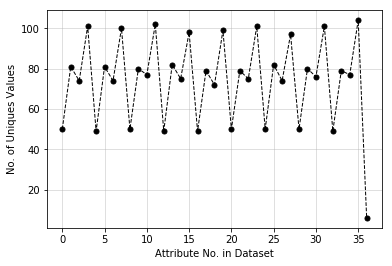

In [16]:
uniques = []
for i in range(df.shape[1]):
    uniques.append(len(df[features[i]].unique()))
    print '%s\t:      %i'%(features[i],uniques[i])
plt.plot(uniques,'ko--',linewidth=1,markersize=5)
plt.grid(alpha=0.5);plt.ylabel('No. of Uniques Values');plt.xlabel('Attribute No. in Dataset')
if False:
    plt.savefig('./Figures/Unique_values_data_satellite.png',dpi=400)

In [18]:
df.isnull().values.any()

False

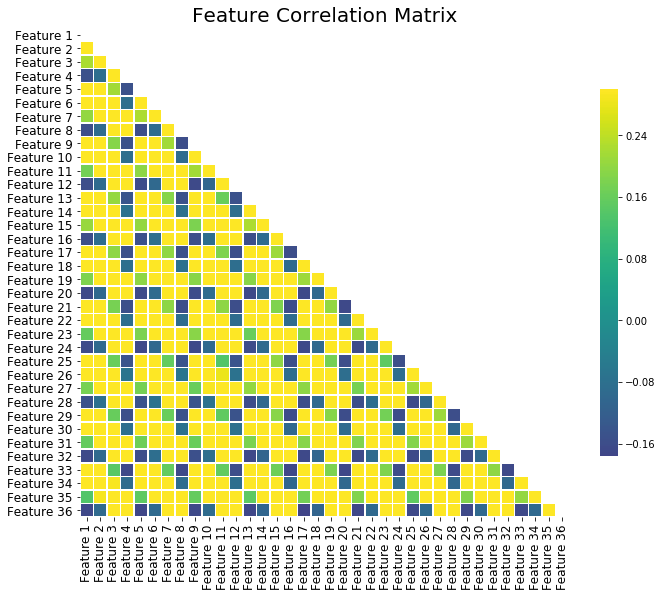

In [8]:
def correlation_matrix(df,savefig=False):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    import seaborn as sns
    labels=['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7','Feature 8','Feature 9','Feature 10','Feature 11','Feature 12','Feature 13','Feature 14','Feature 15','Feature 16','Feature 17','Feature 18','Feature 19','Feature 20','Feature 21','Feature 22','Feature 23','Feature 24','Feature 25','Feature 26','Feature 27','Feature 28','Feature 29','Feature 30','Feature 31','Feature 32','Feature 33','Feature 34','Feature 35','Feature 36',]
    corr = df[labels].corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax1 = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, mask=mask, cmap='viridis',annot=False, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .75})
    ax1.grid(True)
    plt.title('Feature Correlation Matrix',fontsize=20)
    ax1.set_xticklabels(labels,fontsize=12)
    ax1.tick_params(axis='x', rotation=90)
    ax1.tick_params(axis='y', rotation=0)
    ax1.set_yticklabels(labels,fontsize=12)
    ax1.grid(False)
    if savefig:
        plt.savefig('./Figures/Vowel_heatmap.png',dpi=400)

correlation_matrix(df,False)

## Data Analysis

In [20]:
model = svm.SVC()
model.fit(df_normed,df_classes)
print 'Training accuracy: %.4f'%model.score(df_normed,df_classes)
predicted = model.predict(df_normed_test)
print 'Test accuracy:\t   %.4f'%model.score(df_normed_test,df_classes_test)

Training accuracy: 0.9096
Test accuracy:	   0.8895


In [21]:
print '\n'
print classification_report(df_classes_test,predicted)



              precision    recall  f1-score   support

           1       0.96      1.00      0.98       461
           2       0.97      0.97      0.97       224
           3       0.85      0.97      0.91       397
           4       0.71      0.60      0.65       211
           5       0.94      0.81      0.87       237
           7       0.86      0.85      0.85       470

   micro avg       0.89      0.89      0.89      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.89      0.89      0.89      2000



In [23]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf','sigmoid','poly'), 'C':[0.1,1,5,10],'gamma':[0.001,0.01,0.1,1]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(df_normed,df_classes)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf', 'sigmoid', 'poly'), 'C': [0.1, 1, 5, 10], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
clf.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [26]:
accuracy = []; c = []; kernel = []
C_list = list(np.linspace(0.5,3,25)) # creating list of 25 values between 0.5 and 3.0
Gamma_list = list(np.linspace(0.01,0.8,20)) # creating list of 20 values between 0.01 and 0.8
parameters = {'kernel':('linear','rbf'), 'C':C_list,'gamma':Gamma_list}
svc = svm.SVC()
svc.fit(df_normed,df_classes)
accuracy.append(svc.score(df_normed_test,df_classes_test))
# Performing CV
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(df_normed_test,df_classes_test)
# Appending hyperparameter values from GridSearchCV()
c.append(clf.best_params_['C'])
kernel.append(clf.best_params_['kernel'])

In [28]:
clf.best_params_

{'C': 0.5, 'gamma': 0.13473684210526318, 'kernel': 'rbf'}

In [29]:
accuracy[0]

0.8895

>From the coarse grid search, the radial bias function (rbf) and a C-value of 5 was chosen. When a more fine grid search is implemented, the radial bias function (rbf) was chosen to be optimal and a C-value of 4.29.

In [30]:
model = svm.SVC()
model.fit(df_normed,df_classes)
predicted = model.predict(df_normed_test)
print 'Test accuracy:\t   %.4f'%model.score(df_normed_test,df_classes_test) 

Test accuracy:	   0.8895
